# Collect Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Stock_Market_Dataset.csv")
df.head()


,Unnamed: 0,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,0,02-02-2024,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,...,"5,89,498",10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,"2,053.70",NaN
1,1,01-02-2024,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690.0,...,"5,81,600",9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,"2,071.10",260920.0
2,2,31-01-2024,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480.0,...,"5,78,020",9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,"2,067.40",238370.0
3,3,30-01-2024,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130.0,...,"5,84,680",9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,"2,050.90",214590.0
4,4,29-01-2024,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230.0,...,"5,78,800",13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,"2,034.90",1780.0


# Preprocessing Data/ Feature Engineering

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1243 non-null   int64  
 1   Date               1243 non-null   object 
 2   Natural_Gas_Price  1243 non-null   float64
 3   Natural_Gas_Vol.   1239 non-null   float64
 4   Crude_oil_Price    1243 non-null   float64
 5   Crude_oil_Vol.     1220 non-null   float64
 6   Copper_Price       1243 non-null   float64
 7   Copper_Vol.        1206 non-null   float64
 8   Bitcoin_Price      1243 non-null   object 
 9   Bitcoin_Vol.       1243 non-null   float64
 10  Platinum_Price     1243 non-null   object 
 11  Platinum_Vol.      636 non-null    float64
 12  Ethereum_Price     1243 non-null   object 
 13  Ethereum_Vol.      1243 non-null   float64
 14  S&P_500_Price      1243 non-null   object 
 15  Nasdaq_100_Price   1243 non-null   object 
 16  Nasdaq_100_Vol.    1242 

### Reduce unneccesary columns

In [4]:
# Dropping Berkshire_Price due to error in number in column
columns_to_drop = ['Unnamed: 0', 'Berkshire_Price']
                   
df = df.drop(columns = columns_to_drop)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1243 non-null   object 
 1   Natural_Gas_Price  1243 non-null   float64
 2   Natural_Gas_Vol.   1239 non-null   float64
 3   Crude_oil_Price    1243 non-null   float64
 4   Crude_oil_Vol.     1220 non-null   float64
 5   Copper_Price       1243 non-null   float64
 6   Copper_Vol.        1206 non-null   float64
 7   Bitcoin_Price      1243 non-null   object 
 8   Bitcoin_Vol.       1243 non-null   float64
 9   Platinum_Price     1243 non-null   object 
 10  Platinum_Vol.      636 non-null    float64
 11  Ethereum_Price     1243 non-null   object 
 12  Ethereum_Vol.      1243 non-null   float64
 13  S&P_500_Price      1243 non-null   object 
 14  Nasdaq_100_Price   1243 non-null   object 
 15  Nasdaq_100_Vol.    1242 non-null   float64
 16  Apple_Price        1243 

### Convert object datatypes to float

In [5]:
columns = ['Bitcoin_Price',
           'Platinum_Price',
           'Ethereum_Price',
           'S&P_500_Price',
           'Nasdaq_100_Price',
           'Gold_Price'
          ]
for column in columns:
    if df[column].dtype == 'object':
        df[column] = pd.to_numeric(df[column].str.replace(',','',regex=False))
        
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1243 non-null   object 
 1   Natural_Gas_Price  1243 non-null   float64
 2   Natural_Gas_Vol.   1239 non-null   float64
 3   Crude_oil_Price    1243 non-null   float64
 4   Crude_oil_Vol.     1220 non-null   float64
 5   Copper_Price       1243 non-null   float64
 6   Copper_Vol.        1206 non-null   float64
 7   Bitcoin_Price      1243 non-null   float64
 8   Bitcoin_Vol.       1243 non-null   float64
 9   Platinum_Price     1243 non-null   float64
 10  Platinum_Vol.      636 non-null    float64
 11  Ethereum_Price     1243 non-null   float64
 12  Ethereum_Vol.      1243 non-null   float64
 13  S&P_500_Price      1243 non-null   float64
 14  Nasdaq_100_Price   1243 non-null   float64
 15  Nasdaq_100_Vol.    1242 non-null   float64
 16  Apple_Price        1243 

### Fill in NaN values with column mean value

In [6]:
columns_with_null = ['Natural_Gas_Vol.',
                     'Crude_oil_Vol.',
                     'Copper_Vol.',
                     'Platinum_Vol.',
                     'Nasdaq_100_Vol.',
                     'Silver_Vol.',
                     'Gold_Vol.'
                    ]
for column in columns_with_null:
    if column not in df.columns:
        print(f"Column '{column}' not found in DataFrame!")
    else:
        df[column] = df[column].fillna(df[column].mean())

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1243 non-null   object 
 1   Natural_Gas_Price  1243 non-null   float64
 2   Natural_Gas_Vol.   1243 non-null   float64
 3   Crude_oil_Price    1243 non-null   float64
 4   Crude_oil_Vol.     1243 non-null   float64
 5   Copper_Price       1243 non-null   float64
 6   Copper_Vol.        1243 non-null   float64
 7   Bitcoin_Price      1243 non-null   float64
 8   Bitcoin_Vol.       1243 non-null   float64
 9   Platinum_Price     1243 non-null   float64
 10  Platinum_Vol.      1243 non-null   float64
 11  Ethereum_Price     1243 non-null   float64
 12  Ethereum_Vol.      1243 non-null   float64
 13  S&P_500_Price      1243 non-null   float64
 14  Nasdaq_100_Price   1243 non-null   float64
 15  Nasdaq_100_Vol.    1243 non-null   float64
 16  Apple_Price        1243 

### Convert Date column to datetime object

In [7]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               1243 non-null   datetime64[ns]
 1   Natural_Gas_Price  1243 non-null   float64       
 2   Natural_Gas_Vol.   1243 non-null   float64       
 3   Crude_oil_Price    1243 non-null   float64       
 4   Crude_oil_Vol.     1243 non-null   float64       
 5   Copper_Price       1243 non-null   float64       
 6   Copper_Vol.        1243 non-null   float64       
 7   Bitcoin_Price      1243 non-null   float64       
 8   Bitcoin_Vol.       1243 non-null   float64       
 9   Platinum_Price     1243 non-null   float64       
 10  Platinum_Vol.      1243 non-null   float64       
 11  Ethereum_Price     1243 non-null   float64       
 12  Ethereum_Vol.      1243 non-null   float64       
 13  S&P_500_Price      1243 non-null   float64       
 14  Nasdaq_1

### Add days of the week using Date column

In [8]:
df['DayofWeek'] = df['Date'].dt.day_name()
columns = ['Monday','Tuesday','Wednesday','Thursday','Friday']
for day in columns:
    df[day] = (df['DayofWeek'] == day).astype(int)
df =df.drop(columns = ['DayofWeek','Date'])
df.head()

,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,Platinum_Vol.,...,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.,Monday,Tuesday,Wednesday,Thursday,Friday
0,2.079,131624.116223,72.28,398903.778689,3.8215,35406.616915,43194.7,42650.0,901.6,9082.515723,...,117220000.0,474.99,84710000.0,2053.7,211127.671233,0,0,0,0,1
1,2.050,161340.000000,73.82,577940.000000,3.8535,35406.616915,43081.4,47690.0,922.3,9082.515723,...,66360000.0,394.78,25140000.0,2071.1,260920.000000,0,0,0,1,0
2,2.100,142860.000000,75.85,344490.000000,3.9060,35406.616915,42580.5,56480.0,932.6,9082.515723,...,49690000.0,390.14,20010000.0,2067.4,238370.000000,0,0,1,0,0
3,2.077,139750.000000,77.82,347240.000000,3.9110,35406.616915,42946.2,55130.0,931.7,9082.515723,...,42290000.0,400.06,18610000.0,2050.9,214590.000000,0,1,0,0,0
4,2.490,3590.000000,76.78,331930.000000,3.8790,35406.616915,43299.8,45230.0,938.3,9082.515723,...,42840000.0,401.02,17790000.0,2034.9,1780.000000,1,0,0,0,0


# Statistical Tests

### Run Kendall Tau correlation
* Tau is the statiscal measure used to assess the strength and direction of the association between two variables.

In [9]:
from scipy.stats import kendalltau
import numpy as np

In [10]:
x = df.drop(columns='Copper_Price')
y = df['Copper_Price']

In [11]:
results = []

for col in df.columns:
    if col != 'Copper_Price':
        x = df[col]
        valid_data = pd.DataFrame({'x': x, 'y': y}).dropna()
        if not valid_data.empty:
            tau, p_value = kendalltau(valid_data['x'], valid_data['y'])
            
            if np.isfinite(tau) and np.isfinite(p_value):  # Ensure no infinities
                results.append({'Variable': col, 'Tau': tau, 'P-value': p_value})

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Tau', ascending=False)

results_df['P-value'] = results_df['P-value'].apply(lambda x: '{:.4f}'.format(x))  # Format to 8 decimal places

print(results_df)

             Variable       Tau P-value
9      Ethereum_Price  0.711307  0.0000
5       Bitcoin_Price  0.655759  0.0000
11      S&P_500_Price  0.641250  0.0000
22       Google_Price  0.616076  0.0000
12   Nasdaq_100_Price  0.566134  0.0000
16        Tesla_Price  0.546728  0.0000
18    Microsoft_Price  0.516811  0.0000
24       Nvidia_Price  0.506958  0.0000
7      Platinum_Price  0.503627  0.0000
20       Silver_Price  0.487475  0.0000
14        Apple_Price  0.464953  0.0000
2     Crude_oil_Price  0.460525  0.0000
0   Natural_Gas_Price  0.452419  0.0000
29       Amazon_Price  0.399520  0.0000
26     Berkshire_Vol.  0.336146  0.0000
33         Gold_Price  0.335636  0.0000
31         Meta_Price  0.320690  0.0000
27      Netflix_Price  0.224629  0.0000
13    Nasdaq_100_Vol.  0.138798  0.0000
32          Meta_Vol.  0.130833  0.0000
4         Copper_Vol.  0.048378  0.0108
37          Wednesday  0.006106  0.7922
38           Thursday  0.004209  0.8559
39             Friday  0.003032  0.8959


# Hypothesis Results
### Evaluated Criteria
* Tau Coeffecient >= 0.7
* P-value < 0.05

In [19]:
tau_threshold = 0.69
p_value_threshold = 0.05

for col in df.columns:
    if col != 'Copper_Price':
        x = df[col]
        
        # Calculate Kendall's Tau and p-value
        tau, p_value = kendalltau(x, y)
        
        # Check if the Tau and p-value match the criteria
        if tau > tau_threshold and p_value < p_value_threshold:
            print(f"Variable '{col}' meets the criteria: Tau = {tau:.3f}, p-value = {p_value:.4f}")
            print(f"This supports our hypothesis and rejects the null hypohesis.")

Variable 'Ethereum_Price' meets the criteria: Tau = 0.711, p-value = 0.0000
This supports our hypothesis and rejects the null hypohesis.


# Visualize Correlation

### Plot Heatmap showing Correlation

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

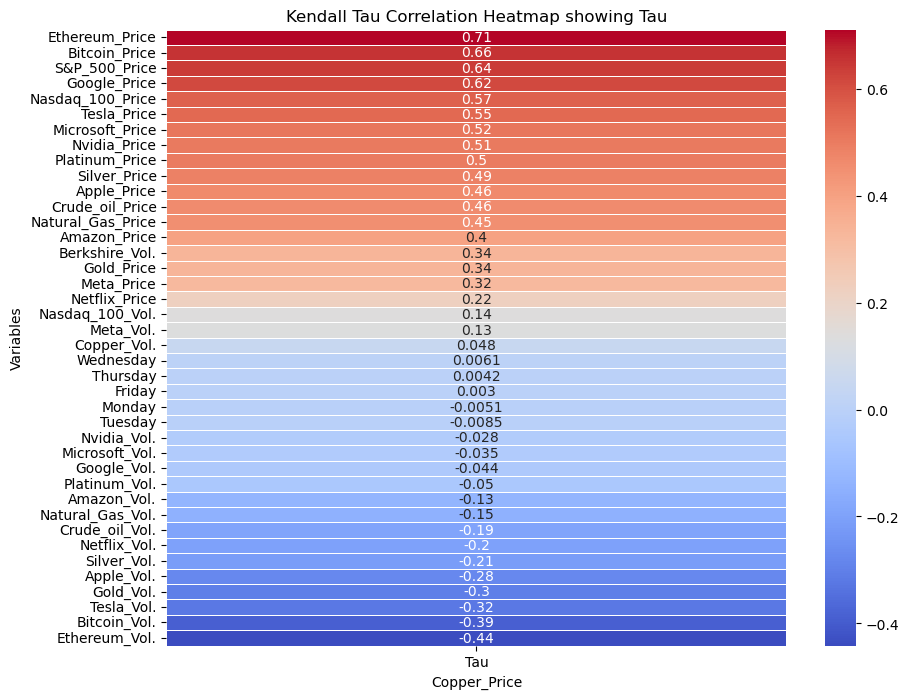

In [13]:
# Set 'Variable' as the index for easier plotting
# We only want to plot the Tau values, not the p-values
heatmap_data = results_df[['Variable', 'Tau']].set_index('Variable')

plt.figure(figsize=(10, 8))

sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', cbar=True, linewidths=0.5)

# Add title and labels
plt.title('Kendall Tau Correlation Heatmap showing Tau')
plt.xlabel('Copper_Price')
plt.ylabel('Variables')

# Show the plot
plt.show()

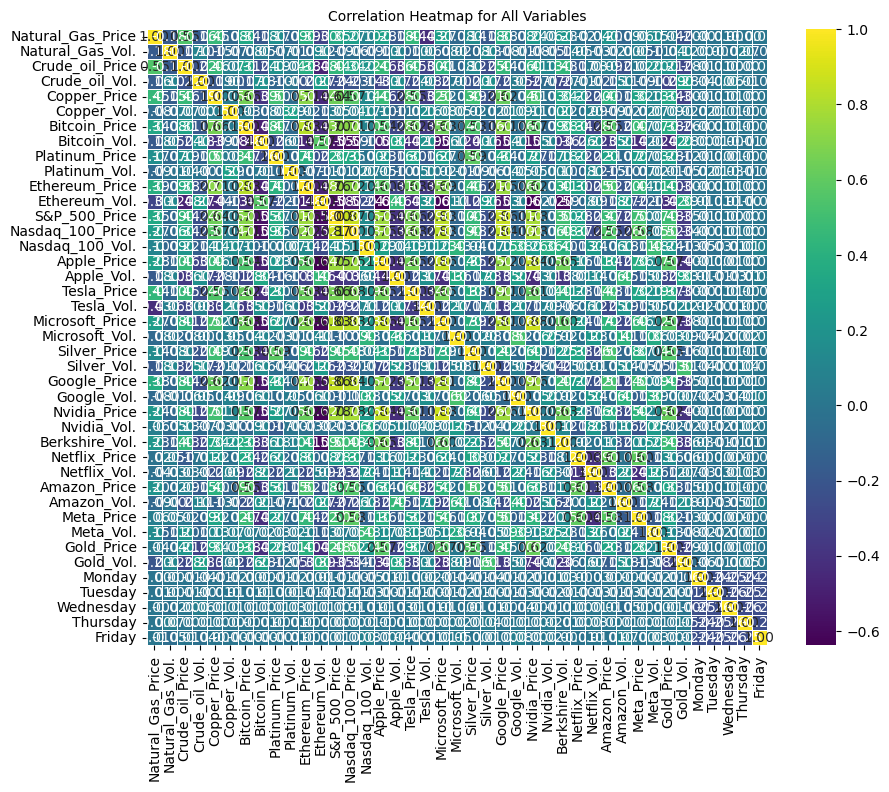

In [23]:
corr_matrix = df.corr(method='kendall')
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for All Variables', fontsize=None)
plt.show()

# Model Creation

### Reduce unneccesary columns

In [20]:
'''columns_to_drop = ['Apple_Price','Apple_Vol.',
                   'Tesla_Price','Tesla_Vol.',
                   'Microsoft_Price','Microsoft_Vol.',
                   'Google_Price','Google_Vol.',
                   'Nvidia_Price','Nvidia_Vol.',
                   'Berkshire_Price','Berkshire_Vol.',
                   'Netflix_Price','Netflix_Vol.',
                   'Amazon_Price','Amazon_Vol.',
                   'Meta_Price','Meta_Vol.',
                   'Unnamed: 0'
                  ]
                   
df = df.drop(columns = columns_to_drop)
df.info()'''

"columns_to_drop = ['Apple_Price','Apple_Vol.',\n                   'Tesla_Price','Tesla_Vol.',\n                   'Microsoft_Price','Microsoft_Vol.',\n                   'Google_Price','Google_Vol.',\n                   'Nvidia_Price','Nvidia_Vol.',\n                   'Berkshire_Price','Berkshire_Vol.',\n                   'Netflix_Price','Netflix_Vol.',\n                   'Amazon_Price','Amazon_Vol.',\n                   'Meta_Price','Meta_Vol.',\n                   'Unnamed: 0'\n                  ]\n                   \ndf = df.drop(columns = columns_to_drop)\ndf.info()"

### Train Model

### Evaluate Model

### Hyperparameter Tuning

### Evaluate Model

# Testing Model

# Results